In [1]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'G'
df = pd.read_excel("Retail2.xlsx")

In [2]:
y = df.set_index(['Date'])
y.head(5)

,Car sales
Date,
2015-06-01,67
2015-07-01,68
2015-08-01,66
2015-09-01,86
2015-10-01,84


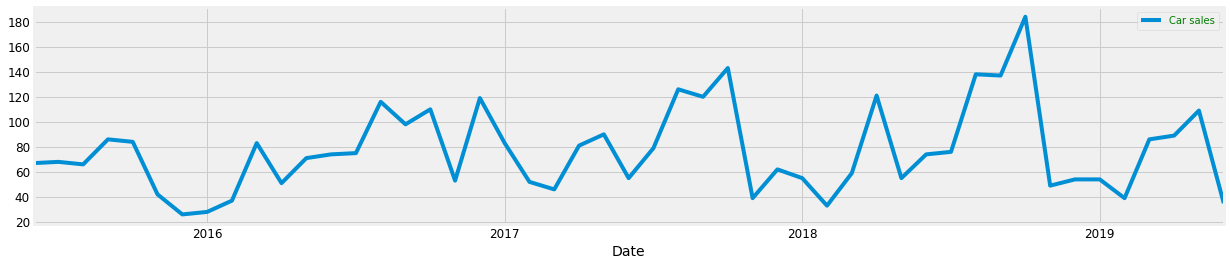

In [3]:
y.plot(figsize=(19, 4))
plt.show()

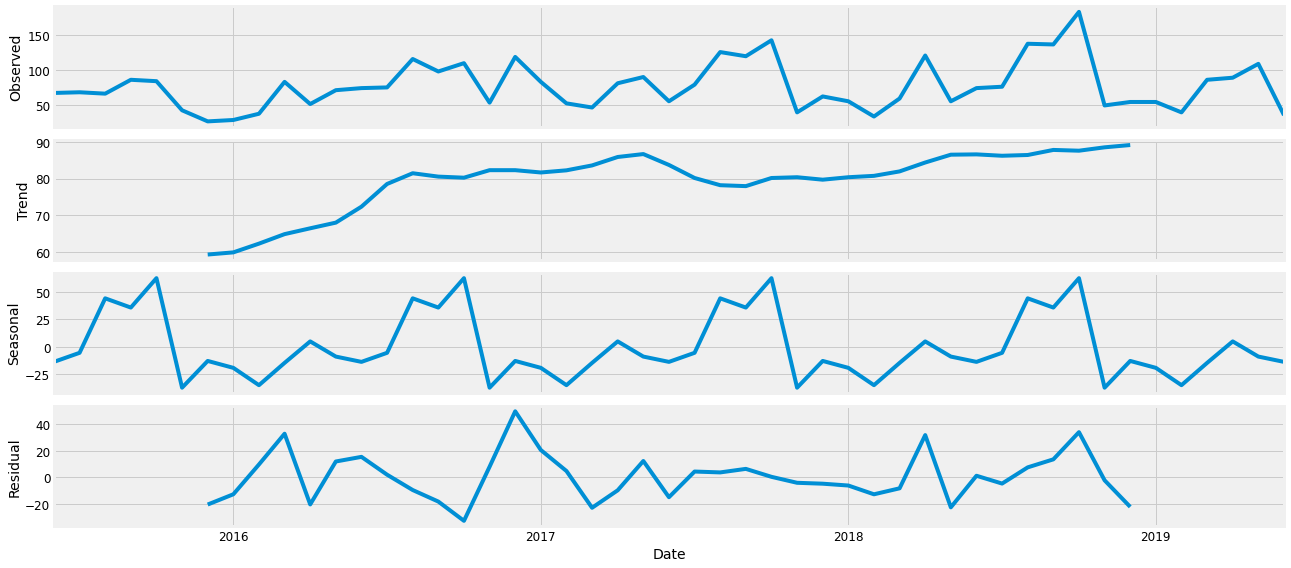

In [4]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

In [5]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter for SARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter for SARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [6]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,order=param,seasonal_order=param_seasonal,enforce_stationarity=False,enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param,param_seasonal,results.aic))
        except: 
            continue

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:564.3056398203263
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:410.52153778626774
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:353.36692989696155
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:nan
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:363.03322198787765
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:348.1373105290518
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:237.2069523573001
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:nan
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:524.3873658732057
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:384.7486382180336
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:345.9523219947399


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C

ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:1013.0977455319688
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:364.8331172721984
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:341.5095766512843
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:239.13525566698246
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:223.43134436185056
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:483.6919410483037


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1253.552458281819
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:362.5428302896552
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:369.72511323614964
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:1217.8169214125162
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:245.23164380483988

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C


ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:465.2805885813828
ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:2803.828309051667
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:335.57067129842477
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:354.8023937893732
ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:1798.7335442974206


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Program

ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:232.7889265082663
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:491.9207667170706
ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:371.3146872089105
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:354.5714763283668


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Program

ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:1139.5710385991356
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:356.06351058328465
ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:349.9838898845715
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:230.34211187424933
ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:231.64300463984364
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:475.93576583758056
ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:350.2225511877502
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:342.87516262297726

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:1224.4404055778937
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:354.1159813305095
ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:340.08111494696726
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:231.89770896198127


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:225.3047154605028
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:479.7643617333384


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:1001.7835077105798
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:354.996679779729
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:354.514994852632


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:1058.378377953276
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:229.9474487085596
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:462.8025055045663
ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:3192.0125807982713

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)



ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:337.556173128962
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:347.48163434720783
ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:1823.4771277424256


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:225.48957479687868


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [7]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(0, 0, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.2084      0.282     -0.739      0.460      -0.761       0.344
ar.S.L12      -0.3157      0.184     -1.720      0.085      -0.675       0.044
ma.S.L12       0.3337      0.439      0.760      0.447      -0.527       1.194
sigma2       650.7902    264.392      2.461      0.014     132.592    1168.989


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


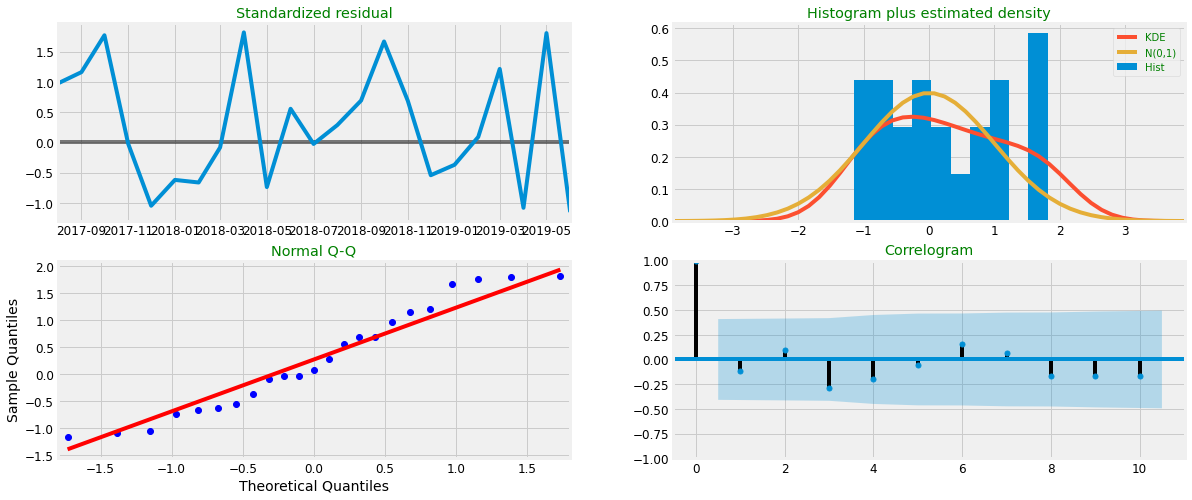

In [8]:
results.plot_diagnostics(figsize=(18, 8))
plt.show()

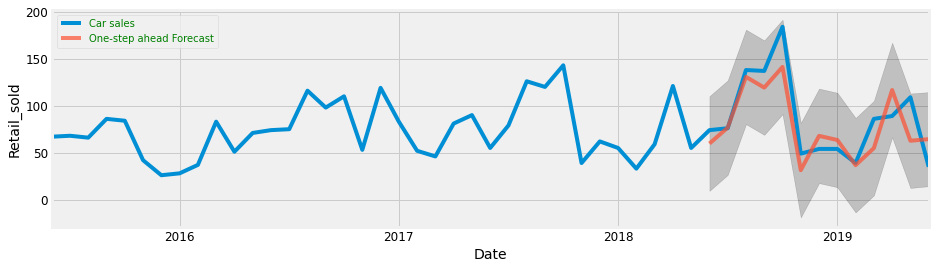

In [9]:
pred = results.get_prediction(start=pd.to_datetime('2018-06-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2015':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 4))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Retail_sold')
plt.legend()
plt.show()

In [10]:
y_forecasted = pred.predicted_mean
y_truth = y['2018-06-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error is {}'.format(round(mse, 2)))
print('The Root Mean Squared Error is {}'.format(round(np.sqrt(mse), 2)))

The Mean Squared Error is 2018-06-01 00:00:00   NaN
2018-07-01 00:00:00   NaN
2018-08-01 00:00:00   NaN
2018-09-01 00:00:00   NaN
2018-10-01 00:00:00   NaN
2018-11-01 00:00:00   NaN
2018-12-01 00:00:00   NaN
2019-01-01 00:00:00   NaN
2019-02-01 00:00:00   NaN
2019-03-01 00:00:00   NaN
2019-04-01 00:00:00   NaN
2019-05-01 00:00:00   NaN
2019-06-01 00:00:00   NaN
Car sales             NaN
dtype: float64
The Root Mean Squared Error is 2018-06-01 00:00:00   NaN
2018-07-01 00:00:00   NaN
2018-08-01 00:00:00   NaN
2018-09-01 00:00:00   NaN
2018-10-01 00:00:00   NaN
2018-11-01 00:00:00   NaN
2018-12-01 00:00:00   NaN
2019-01-01 00:00:00   NaN
2019-02-01 00:00:00   NaN
2019-03-01 00:00:00   NaN
2019-04-01 00:00:00   NaN
2019-05-01 00:00:00   NaN
2019-06-01 00:00:00   NaN
Car sales             NaN
dtype: float64


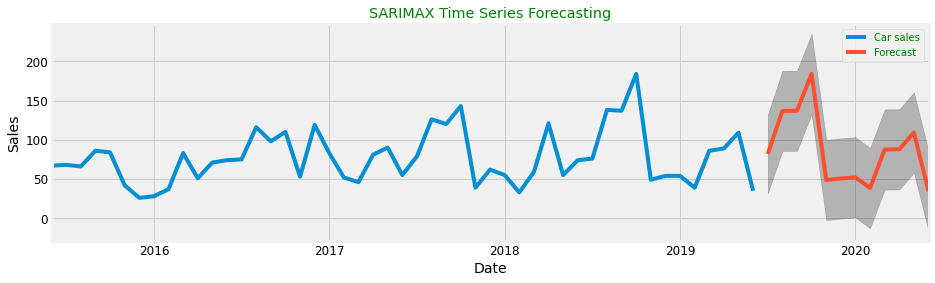

In [12]:
pred_uc = results.get_forecast(steps=12)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 4))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Sales')
plt.title('SARIMAX Time Series Forecasting')
plt.legend()
plt.show()

In [13]:
pred_ci

,lower Car sales,upper Car sales
2019-07-01,31.846160,131.908064
2019-08-01,85.576140,187.785388
2019-09-01,85.876846,188.086066
2019-10-01,132.847593,235.056813
2019-11-01,-2.378853,99.830367
2019-12-01,-0.379817,101.829404
2020-01-01,1.034268,103.243488
2020-02-01,-12.576802,89.632418
2020-03-01,36.492424,138.701644
2020-04-01,36.709164,138.918385


In [14]:
pred_ci.iloc[:, 0]

2019-07-01     31.846160
2019-08-01     85.576140
2019-09-01     85.876846
2019-10-01    132.847593
2019-11-01     -2.378853
2019-12-01     -0.379817
2020-01-01      1.034268
2020-02-01    -12.576802
2020-03-01     36.492424
2020-04-01     36.709164
2020-05-01     58.062528
2020-06-01    -16.749453
Freq: MS, Name: lower Car sales, dtype: float64

In [17]:
pred_uc = results.get_forecast(steps=12)

In [23]:
pred_uc.predicted_mean

2019-07-01     81.877112
2019-08-01    136.680764
2019-09-01    136.981456
2019-10-01    183.952203
2019-11-01     48.725757
2019-12-01     50.724793
2020-01-01     52.138878
2020-02-01     38.527808
2020-03-01     87.597034
2020-04-01     87.813775
2020-05-01    109.166022
2020-06-01     34.327682
Freq: MS, dtype: float64